# Banking -Loan prediction problem
---

---



>> Another same problem is --> Big Mart Problem

all the discussion goes here...
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/?utm_source=blog&utm_medium=comprehensive-guide-k-means-clustering#problem_statement


In [0]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [0]:
df= pd.read_csv('clustering.csv')

In [4]:
data = df.copy()
print(data.shape)
data.head()

(381, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


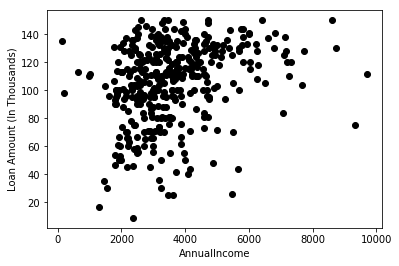

In [48]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

`choosing the number of clusters (k) and selecting random centroids for each cluster. We will pick 3 clusters and then select random observations from the data as the centroids:`

In [49]:
#number of clusters
K=3
# Select random observation as centroids
Centroids = (X.sample(n=K))  # randomly selecting the centroid for each cluster
print(Centroids)

     LoanAmount  ApplicantIncome
118       120.0             1907
289        90.0             2483
312       119.0             3597


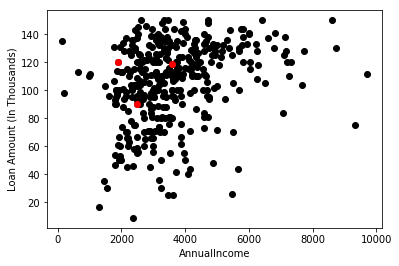

In [50]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()



---
other works start here

In [51]:
print(Centroids.iterrows())
print(list(Centroids.iterrows()))

<generator object DataFrame.iterrows at 0x7f90180e6b48>
[(118, LoanAmount          120.0
ApplicantIncome    1907.0
Name: 118, dtype: float64), (289, LoanAmount           90.0
ApplicantIncome    2483.0
Name: 289, dtype: float64), (312, LoanAmount          119.0
ApplicantIncome    3597.0
Name: 312, dtype: float64)]


In [52]:
list(X.iterrows())[:3]

[(0, LoanAmount          128.0
  ApplicantIncome    4583.0
  Name: 0, dtype: float64), (1, LoanAmount           66.0
  ApplicantIncome    3000.0
  Name: 1, dtype: float64), (2, LoanAmount          120.0
  ApplicantIncome    2583.0
  Name: 2, dtype: float64)]

In [0]:
def dis(X):
    XD=X
    i=1    # here 'i' symbol for number of centroid
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED     
        i=i+1
    return X

In [55]:
X_copy = X.copy()
X_copy = dis(X_copy)
print(X_copy.shape)
X_copy.head()

(381, 5)


,LoanAmount,ApplicantIncome,1,2,3
0,128.0,4583,2676.011958,2100.343781,986.041074
1,66.0,3000,1094.333130,517.556760,599.347979
2,120.0,2583,676.000000,104.403065,1014.000493
3,141.0,6000,4093.053872,3517.369756,2403.100705
4,95.0,2333,426.732938,150.083310,1264.227828


In [56]:
 for index,row in X_copy[:3].iterrows():
    print('INDEX_{}'.format(index) ,'---------------> ',row)

INDEX_0 --------------->  LoanAmount          128.000000
ApplicantIncome    4583.000000
1                  2676.011958
2                  2100.343781
3                   986.041074
Name: 0, dtype: float64
INDEX_1 --------------->  LoanAmount           66.000000
ApplicantIncome    3000.000000
1                  1094.333130
2                   517.556760
3                   599.347979
Name: 1, dtype: float64
INDEX_2 --------------->  LoanAmount          120.000000
ApplicantIncome    2583.000000
1                   676.000000
2                   104.403065
3                  1014.000493
Name: 2, dtype: float64


`AS WE CAN CEARLY SEE FROM THE ABOVE CODE EVERY ROW HAS THE VALUE CORRESPONDING COLUMN '1' that is nothing but the distance from the centroid to each data point in the cluster 1. we will use this in next chunk of code.`

In [57]:
for index,row in X_copy[:3].iterrows():
  print(row[1])

2676.011958119769
1094.3331302670133
676.0


other work ends here


---



#Put all the code together

In [59]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0
num = 1
while(diff!=0):
    print("Iterate : {}".format(num))
    num+=1
    
    
    XD=X
    i=1    # here 'i' symbol for number of centroid
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED     
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    # Now calculate the difference bwtween the new value of the centroid and old value per cluster .....after that calculate their sum
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

Iterate : 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Iterate : 2
671.1607225391299
Iterate : 3
598.5995017654463
Iterate : 4
473.03635517685353
Iterate : 5
412.2768119137969
Iterate : 6
399.0037025214242
Iterate : 7
171.01260458477708
Iterate : 8
230.6385217291991
Iterate : 9
284.4697428802208
Iterate : 10
211.49712199238922
Iterate : 11
223.05789077458954
Iterate : 12
196.02528244567318
Iterate : 13
98.01161657776196
Iterate : 14
52.84741626127729
Iterate : 15
98.54724443834282
Iterate : 16
90.64953219227577
Iterate : 17
18.274686272279013
Iterate : 18
9.21023994083339
Iterate : 19
18.345487493007468
Iterate : 20
46.27013250786139
Iterate : 21
0.0


`We can see here after 21 iteration we are getting same centroid in the clusters. The number of iterations can be reduced by taking more optimal centroids initially (randomly).`

#Visualization

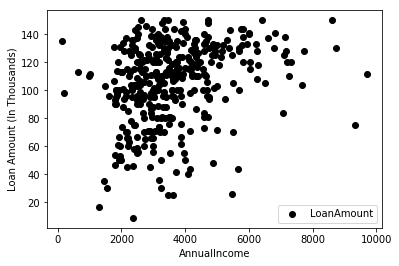

In [69]:
p = df[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(p["ApplicantIncome"],p["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.legend()
plt.show()

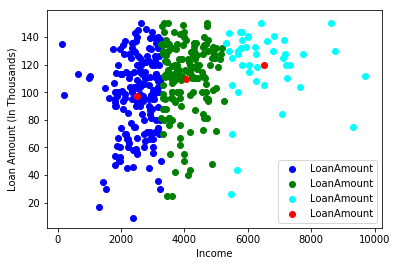

In [70]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.legend()
plt.savefig('1.png')
plt.show()

1.) **One of the common challenges we face while working with K-Means is that the size of clusters is different.**

2.) Another challenge with k-means is when the densities of the original points are different. the points some clusters are spread out whereas the points in the remaining clusters are closely packed together.

#It's time to apply machine laerning Algorithm
#Implementing K-Means Clustering in Python

In [0]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

`The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc. `

In [73]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("WholesaleCustomersData.csv")
print(data.shape)
data.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [74]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [75]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [76]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [77]:
# standardizing / Scaling / Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [78]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
# inertia on the fitted data   for k=2 clusters
# if number of cluters increase then corresponding inertia value decrease till a point after that inertia becomes constant
kmeans.inertia_

2599.384423783625

We got an inertia value of almost 2600. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


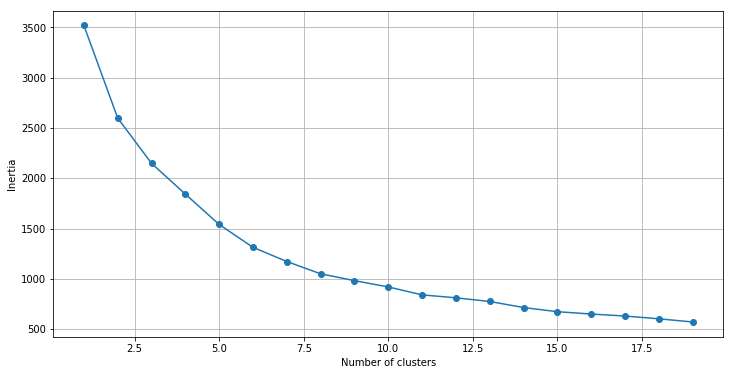

In [81]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid('on')
plt.show()

In [0]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [85]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    209
1    126
0     91
4     11
3      3
Name: cluster, dtype: int64